In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Pustaka Program Decision Tree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MACHINE LEARNING/Praktikum 3/Data/stunting_wasting_dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


In [ ]:
# cek missing value
df.isnull().sum()

,0
Jenis Kelamin,0
Umur (bulan),0
Tinggi Badan (cm),0
Berat Badan (kg),0
Stunting,0
Wasting,0


In [ ]:
# Cek Duplicate
df.duplicated().sum()


np.int64(7308)

In [ ]:
# menghapus data Duplicate
df.drop_duplicates()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight
...,...,...,...,...,...,...
99993,Laki-laki,12,83.4,11.8,Tall,Risk of Overweight
99994,Laki-laki,11,81.1,8.8,Normal,Normal weight
99995,Laki-laki,11,75.3,7.3,Normal,Underweight
99996,Laki-laki,21,93.7,14.8,Normal,Risk of Overweight


In [ ]:
# cek duplicate ulang setelah menghapus
df.duplicated().sum()

np.int64(7308)

In [ ]:
df = df.rename(columns={
    'Jenis Kelamin': 'jenis_kelamin',
    'Umur (bulan)': 'umur',
    'Tinggi Badan (cm)': 'tinggi_badan',
    'Berat Badan (kg)': 'berat_badan',
    'Stunting': 'stunting',
    'Wasting': 'wasting'
})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   jenis_kelamin  100000 non-null  object 
 1   umur           100000 non-null  int64  
 2   tinggi_Badan   100000 non-null  float64
 3   berat_badan    100000 non-null  float64
 4   stunting       100000 non-null  object 
 5   wasting        100000 non-null  int8   
dtypes: float64(2), int64(1), int8(1), object(2)
memory usage: 3.9+ MB


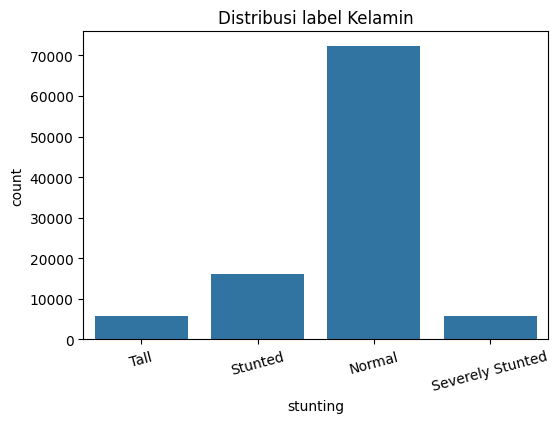

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='stunting')
plt.title('Distribusi label Kelamin')
plt.xticks(rotation=15)
plt.show()

In [ ]:
# mapping label -> kode untuk target
stunting_cat = df['stunting'].astype('category')
stunting_cat_codes = dict(enumerate(stunting_cat.cat.categories))
print(stunting_cat_codes)

# fitur kategorikal lain (jenis_kelamin, wasting) -> kode juga
for col in ['jenis_kelamin', 'wasting']:
    if col in df.columns:
        df[col] = df[col].astype('category').cat.codes
df.head()

{0: 'Normal', 1: 'Severely Stunted', 2: 'Stunted', 3: 'Tall'}


,jenis_kelamin,umur,tinggi_Badan,berat_badan,stunting,wasting
0,0,19,91.6,13.3,Tall,1
1,0,20,77.7,8.5,Stunted,3
2,0,10,79.0,10.3,Normal,1
3,1,2,50.3,8.3,Severely Stunted,1
4,1,5,56.4,10.9,Severely Stunted,1


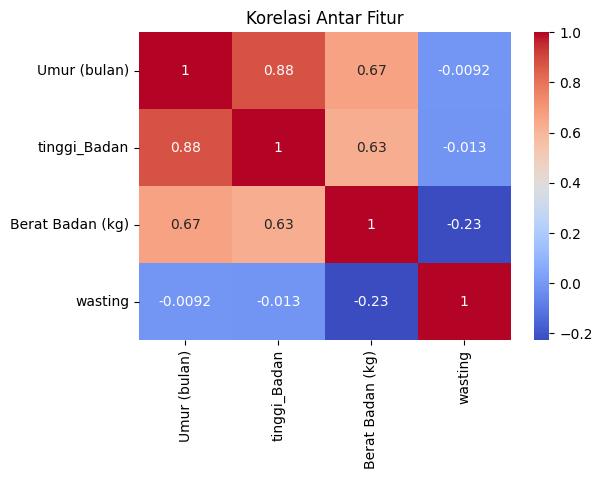

In [ ]:
# analisis korelasi antara fitur
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

In [ ]:
# Memilih fitur dan target
feature_cols = ['jenis_kelamin', 'umur', 'tinggi_badan', 'berat_badan']
target_col = 'stunting'

X = df[feature_cols]
y = df[target_col]

Index(['jenis_kelamin', 'umur', 'tinggi_Badan', 'berat_badan', 'stunting',
       'wasting'],
      dtype='object')


In [ ]:
# Membagi dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
len(X_train), len(X_test)

(80000, 20000)

In [ ]:
# Membangun model
dt = DecisionTreeClassifier(criterion='gini',max_depth=4, random_state=42)
dt.fit(X_train, y_train)

ValueError: could not convert string to float: 'Perempuan'